<a href="https://colab.research.google.com/github/AnalyzedChris/WQU_PROJECT-1/blob/main/FD_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
!pip install pandas_datareader
!pip install yfinance pandas beautifulsoup4 requests lxml matplotlib
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from sklearn.decomposition import PCA
import datetime
import yfinance as yf
import requests
from bs4 import BeautifulSoup

### **Data Quality**

The current financial challenges and economic slowdown unvails the critical role of informed financial decision-making for individuals (W. Fan et al., 2001), businesses and organizations alike. Effective decision-making begins with robust intelligence gathering, which in turn relies heavily on high-quality data to drive optimal outcomes (C.W. Fisher et al., 2001).

Like everything else around us, the financial markets have drastically changed
as a result of the information technology revolution
which has enabled the automation and computerisation
of work processes and business functions, as well as
the generation and fast processing of bogus volumes
of data that has in turn fostered innovation in new
financial products and strategies (N. Jenkinson et al., 2003).

A well structured data is highly essential for a well-functioning financial markets globally, catering to the requirements of both public and private sectors.

As Nigel Jenkinson and Irina note:
"""<i>Inadequate quality and standardisation of financial
Data led to an unacceptable high operational risk of trade processing; poor monitoring and management of financial risks at the individual firm and system-wide levels, by not allowing effective aggregation of positions at the entity and product level across markets; as well as providing obstacles to the effective execution of insolvency and resolution procedures.</i> Such inadequacies ultimately fuelled and exacerbated the current financial crisis."""

Therefore, a proper and extensive data framework that delivers accurate and up-to-date insights on financial positions, exposures and risks in an organization is highly essential so as to informed effective risk management.


In [2]:
# Example of a poor quality structured data randomly initiated
data = {
    "Customer_ID": ['001', '002', None, '004', '005', '006'],
    "Name": ['John', '', 'Wale D.', 'Chris', 'TUNDE', 'johN'],
    "Order_ID": [1001, 1002, 1003, 1004, 1005, 1006],
    "Order_Date": ['01/05/24', '2024-06-02', '06/03/2024', '06-06-24', '05/06/24', 'June 6'],
    "Product": ['Beats speaker', 'Soundcore 14, Macbook', 'NULL', 'Apple earpod', 'JBL', 'NULL'],
    "Quantity": ['1', 'two', '1, 2', '1', '-1', '1'],
    "Price": ['999', '', '999,1299', '799', '999', '899'],
    "Description": ['-', 'urgent delivery', 'Combined order', '-', 'return processed', 'duplicate customer, lowercase name']
}

# Load into a DataFrame
df_uncleaned = pd.DataFrame(data)

# Display the raw dataset
print("Uncleaned Data:")
print(df_uncleaned)

Uncleaned Data:
  Customer_ID     Name  Order_ID  Order_Date                Product Quantity  \
0         001     John      1001    01/05/24          Beats speaker        1   
1         002               1002  2024-06-02  Soundcore 14, Macbook      two   
2        None  Wale D.      1003  06/03/2024                   NULL     1, 2   
3         004    Chris      1004    06-06-24           Apple earpod        1   
4         005    TUNDE      1005    05/06/24                    JBL       -1   
5         006     johN      1006      June 6                   NULL        1   

      Price                         Description  
0       999                                   -  
1                               urgent delivery  
2  999,1299                      Combined order  
3       799                                   -  
4       999                    return processed  
5       899  duplicate customer, lowercase name  


This is a random example of a poor quality structured data. Although the data are structured in a tabular format, in rows and columns, but has high level of errors, and inconsistencies that affect its reliability and usability.

The poor quality of this data can be idetified by the inconsistency in the data formatting (01/05/24, 2024-06-02, June 6), likewise, the name column characters are not consistent, with some names having an higher case while the rest with lower cases. Also, there are missing and invalid values in some cells which definitely would thwart the result of the analysis. Additionally, some columns contain multiple values in a single cell, for instance, in the product column, a cell contains both 'soundcore 14' and 'Macbook' which are two seperate categories of product.

In [3]:
# Poor quality unstructured financial statements randomly initiated
unstructured_data_poor_formal = [
    "The stock moved qu0ote a bit today due to several factors, although it’s unclear which ones were most important.",
    "Management discussed some strategic priorities during the call, but% the details were not very specific.",
    "There may be a $hift in macro conditions soon, but timing and impact are difficult to determine at this stage.",
    "The company appears to be doing relatively well, th-ough exact figures weren't emphasized in the update.",
    "Some uncertainty remains aroundjnjthe interest[] rate environment, so investors might want to be cautious.",
    "It seems th$at earnings were affected by a number of variables, including external ones, but it’s hard to quantify how much.",
    "There& was some comme=tary around forward guidance, but the implications are somewhat unclear.",
    "Valuations are arguably high, depending on how you interpret current market expectations.",
    "Profit margins could improve going forward, assuming current trends continue, though that’s not guaranteed.",
    "While t*here are headwinds, the overall outlook could still be described as cautiously optimistic."
]


Although poor quality are quite difficult to spot in unstructure data, yet, this unstructured data (financial statement) is a poor quality data because it contains Inaccuracies (e.g., "qu0ote" instead of "quite", "th-ough" instead of "though" etc). Also, It contains incompleteness with the text lacking specific details and concrete data (e.g., exact figures, specific dates, quantifiable metrics). Additionally, the data has unclear or imprecise terminologyies with terms like "relatively well", "high valuations", and "cautiously optimistic" are subjective and may be interpreted differently by various readers.

# **Yield Curve**

Yield curve is the relationship between bond yields (interest rates) and their respective maturity periods. It reveals how bond yields varies across different bond durations, which may range from short-term to long-term.
Below is an analysis of US Treasury yields within 30yrs maturity date in 2024.

### `Nelson-Siegel model`

The Nelson-Siegel model is simply a mathematical formula that helps us draw and understand this yield curve.
This model basically analyzes the yield curve by sectionizing it into three components:

1. Level: An overview average level of the interest rates of the bond
2. Slope: The difference between short-term and long-term interest rates
3. Curvature: The shape of the yield curve, displaying a bend from a simple linear relationship

Nelson-Siegel model I mathematicaly expressed as:

R(t)=β
0
​
 +β
1
​
 (
λt
1−e
−λt
 )+β
2
​
 (
λt
1−e
−λt −e
−λt
 )

Where:
- R(t): Yield at maturity
- β0: Long-term level
- β1: Short-term slope component
- β2: Curvature component
- λ: Decay parameter
- e: Exponential function (e^x)


In [4]:
# Define date range
start = datetime.datetime(2024, 1, 1)
end = datetime.datetime(2024, 12, 31)

# FRED codes for Treasury yields
tickers = {
    '1M': 'DGS1MO',
    '3M': 'DGS3MO',
    '6M': 'DGS6MO',
    '1Y': 'DGS1',
    '2Y': 'DGS2',
    '5Y': 'DGS5',
    '7Y': 'DGS7',
    '10Y': 'DGS10',
    '20Y': 'DGS20',
    '30Y': 'DGS30'
}

# Load data
data = pd.DataFrame()
for label, code in tickers.items():
    data[label] = web.DataReader(code, 'fred', start, end)

# Drop missing values
data.dropna(inplace=True)
print(data.tail())

              1M    3M    6M    1Y    2Y    5Y    7Y   10Y   20Y   30Y
DATE                                                                  
2024-12-24  4.44  4.40  4.30  4.24  4.29  4.43  4.52  4.59  4.84  4.76
2024-12-26  4.45  4.35  4.31  4.23  4.30  4.42  4.49  4.58  4.83  4.76
2024-12-27  4.44  4.31  4.29  4.20  4.31  4.45  4.53  4.62  4.89  4.82
2024-12-30  4.43  4.37  4.25  4.17  4.24  4.37  4.46  4.55  4.84  4.77
2024-12-31  4.40  4.37  4.24  4.16  4.25  4.38  4.48  4.58  4.86  4.78


In [5]:
# Get most recent date's yield curve
latest_yields = data.iloc[-1]
print(f"\nDate: {data.index[-1].date()}")
print(latest_yields)



Date: 2024-12-31
1M     4.40
3M     4.37
6M     4.24
1Y     4.16
2Y     4.25
5Y     4.38
7Y     4.48
10Y    4.58
20Y    4.86
30Y    4.78
Name: 2024-12-31 00:00:00, dtype: float64


In [6]:
# Maturities in years
maturity_map = {
    '1M': 1/12, '3M': 3/12, '6M': 6/12,
    '1Y': 1, '2Y': 2, '5Y': 5,
    '7Y': 7, '10Y': 10, '20Y': 20, '30Y': 30
}

maturities = np.array([maturity_map[key] for key in latest_yields.index])
yields = latest_yields.values

def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    term1 = (1 - np.exp(-lambd * tau)) / (lambd * tau)
    term2 = term1 - np.exp(-lambd * tau)
    return beta0 + beta1 * term1 + beta2 * term2

# Initial guess
initial_guess = [4.0, -2.0, 1.0, 0.5]

# Fitting Nelson's model
params, _ = curve_fit(nelson_siegel, maturities, yields, p0=initial_guess)
beta0, beta1, beta2, lambd = params
print(f"Fitted Parameters:\n β0 = {beta0:.4f}, β1 = {beta1:.4f}, β2 = {beta2:.4f}, λ = {lambd:.4f}")

Fitted Parameters:
 β0 = 4.9331, β1 = -0.5158, β2 = -1.6016, λ = 0.6673


Based on the Nelson-Siegel model analysis Above, the result parameters include:
Based on your output:

β0
​
 =4.9331 a value of 4.9331 indicate that very long-term interest rates are expected to be around 4.9331%. This gives the overall height of the yield curve.

β1=−0.5158 a value of −0.5158 indicates a negative slope for the short end of the yield curve. This means that short-term interest rates are currently higher than longer-term rates, inferring an "reverse" portion of the yield curve. An inverted yield curve usually suggest a potential economic downtime or recession.

β2=−1.6016 a value of −1.6016 s a indicate curvature, which suggest a "dip" in the yield curve for medium-term maturities, or that the curve is somehow concave. This infer that the medium-term rates are relatively lower than what a simple upward or downward slope would suggest.

λ=0.6673 a value of 0.6673 indicates that short-term dynamics have a significant but moderate impact on the yield curve, primarily influencing short to medium-term maturities. The curvature component's effect peaks at a relatively short to medium maturity and diminishes quickly as maturities lengthen, transitioning to long-term trends at a noticeable pace.



# `Cubic Splines`

Cubic spline is a highly efficient way to illustrate a moderately smooth, flexible, and natural-looking curve through a set of unarraged points by breaking the problem into manageable, smoothly connected segments.

Real-world data often poses analytical challenges due to its complexity. Finding a single function to accurately model the data can be elusive and result in cumbersome equations. To address this, the cubic spline method was developed, which involves fitting a series of cubic polynomials between data points to create a smooth and continuous curve. This technique enables the calculation of rates of change and cumulative changes over specific intervals (McKinley et al., 1998).

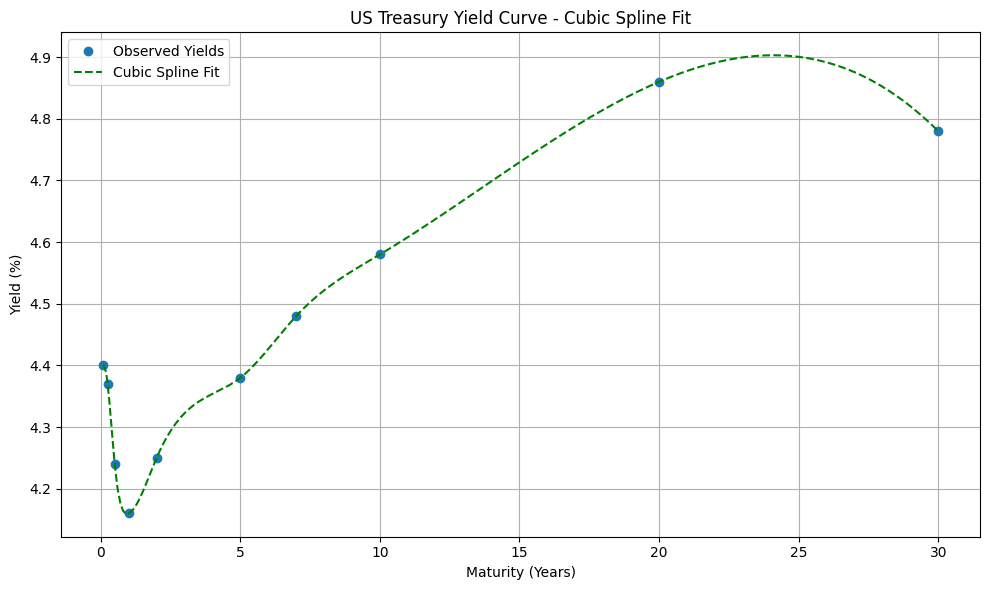

In [7]:
# Fit Cubic Spline
spline_model = CubicSpline(maturities, yields)

# Generate smooth curve
maturity_smooth = np.linspace(0.1, 30, 300)
yield_smooth = spline_model(maturity_smooth)

plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, 'o', label='Observed Yields')
plt.plot(maturity_smooth, yield_smooth, 'g--', label='Cubic Spline Fit')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('US Treasury Yield Curve - Cubic Spline Fit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The Cubic spline graphical visualize further explain the Nelson Sielgel analysis done above. The graph shows:

Short End (0.1 to ~ 0.5 years): The curve shows an inverted section where yields initially drop sharply. This means very short-term interest rates are higher than slightly longer-term short-term rates.

Transition (around 1-2 years): The curve then quickly changes direction, sloping upward.

Mid-to-Long Term (2 to ~ 25 years): The curve generally slopes upward, indicating that longer maturities command higher yields. This is the more typical "normal" shape, compensating investors for taking on more interest rate risk over longer periods.

Very Long End (~25 to 30 years): The curve shows a slight flattening and then a slight decline at the very longest maturities. This could suggest that for the longest terms, either inflation expectations are lower, or there's less demand for extremely long-term debt at very high rates.

# **Exploiting Correlation**

Correlation refers to a statistical relationship between two or more variables. It indicate if two things are linked and how they behave, also how strongly they're linked, and if they move in the same or opposite directions.

**`Gaussian variables`**

Gaussian variables is a type of data that follows a very specific and common pattern of distribution called the Normal Distribution. It's a concept used to understanding how data is spread out, with most values clustering around the average and fewer values at the extremes.

Below are block of codes used to Generate 5 uncorrelated Gaussian random variables that simulate yield changes with a mean close to 0 and a standard deviation that is small.

In [8]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate 5 uncorrelated yield changes over 120 days (~6 months)
n_obs = 120
n_vars = 5

# Generate from standard normal distribution (mean ≈ 0, std ≈ 0.05)
data = np.random.normal(loc=0.0, scale=0.05, size=(n_obs, n_vars))

# Put into a DataFrame for easier handling
labels = [f'Asset_{i+1}' for i in range(n_vars)]
uncorrelated_df = pd.DataFrame(data, columns=labels)

# Check the correlation matrix (should be close to identity)
print("Correlation matrix:\n", uncorrelated_df.corr())

Correlation matrix:
           Asset_1   Asset_2   Asset_3   Asset_4   Asset_5
Asset_1  1.000000 -0.106413  0.031354 -0.040742 -0.120425
Asset_2 -0.106413  1.000000  0.114715  0.048079  0.123577
Asset_3  0.031354  0.114715  1.000000  0.021320  0.074040
Asset_4 -0.040742  0.048079  0.021320  1.000000 -0.029666
Asset_5 -0.120425  0.123577  0.074040 -0.029666  1.000000


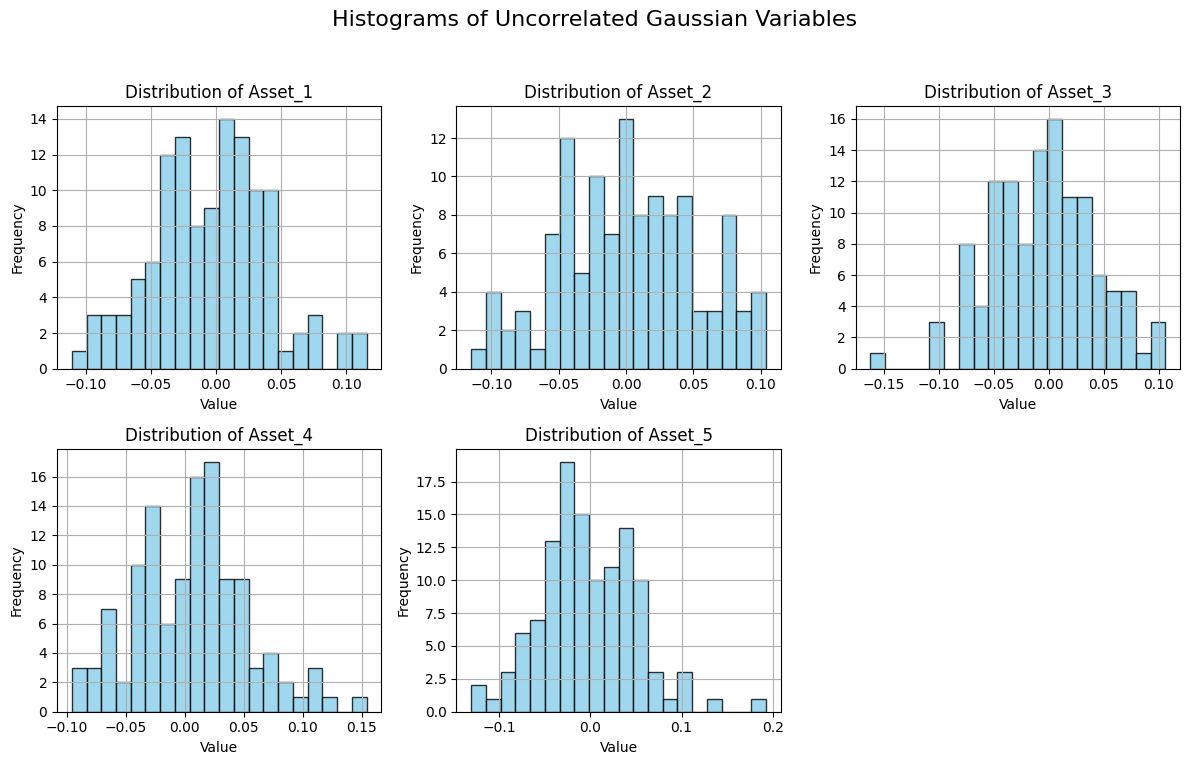

In [9]:
# Set up subplots
plt.figure(figsize=(12, 8))

for i, col in enumerate(uncorrelated_df.columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(uncorrelated_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.suptitle('Histograms of Uncorrelated Gaussian Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The above graph shows that the bars are generally tallest around the center (close to 0) on the x-axis which indicates that most of the observed values for each asset are concentrated around the mean.

The overall shape of each histogram approximates a bell curve, which is characteristic of a Gaussian (normal) distribution. The slight irregularities are due to the random nature of the simulation and the finite number of observations (120 in this case).

Primarily, these histograms visually confirm that each simulated assets follows the expected Gaussian distribution, with their values primarily centered around zero.

# Principal Component Analysis (PCA)

PCA is a statistical technique used for dimensionality reduction and data visualization. It is mainly used to transform a set of possibly correlated variables into a set of linearly uncorrelated variables called principal components (PCs).

PCA using the covariance matrix help to find the directions (eigenvectors) along which the data varies the most, and then using these directions to create a new, lower-dimensional representation of the data that retains the most important information.

In [10]:
# Fit PCA
pca = PCA()
pca.fit(uncorrelated_df)

# Explained variance ratios
explained_var_ratio = pca.explained_variance_ratio_

# Display variance explained
for i, ratio in enumerate(explained_var_ratio):
    print(f"Component {i+1}: {ratio:.4f} ({ratio * 100:.2f}%) of total variance")


Component 1: 0.2698 (26.98%) of total variance
Component 2: 0.2087 (20.87%) of total variance
Component 3: 0.1906 (19.06%) of total variance
Component 4: 0.1797 (17.97%) of total variance
Component 5: 0.1513 (15.13%) of total variance


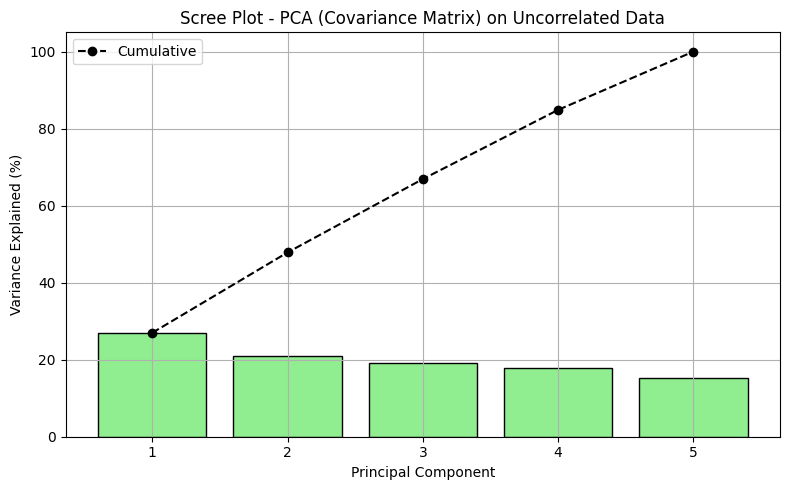

In [11]:
# Visualize with a Scree Plot

components = np.arange(1, len(explained_var_ratio) + 1)

plt.figure(figsize=(8, 5))
plt.bar(components, explained_var_ratio * 100, color='lightgreen', edgecolor='black')
plt.plot(components, np.cumsum(explained_var_ratio * 100), 'o--', color='black', label='Cumulative')
plt.title('Scree Plot - PCA (Covariance Matrix) on Uncorrelated Data')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.xticks(components)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In the provided Scree Plot, we can observe the individual contributions of the first three principal components to the total variance. Component 1 explains approximately 27% of the total variance, making it the single largest contributor to the data's spread. Following this, Component 2 accounts for about 21% of the variance, and Component 3 explains roughly 20%. These figures highlight that while Component 1 captures the most variance, the subsequent components also contribute significantly and somewhat evenly, which is characteristic of PCA applied to uncorrelated data where variance is distributed across multiple dimensions rather than concentrated in a few.

# **Using Real-time Data**

In [12]:
# Step 1: Define date range (last 6 months)
end = datetime.datetime.today()
start = end - datetime.timedelta(days=6*30)  # approx 6 months

# Step 2: Choose 5 maturities
tickers = {
    '3M': 'DGS3MO',
    '1Y': 'DGS1',
    '2Y': 'DGS2',
    '5Y': 'DGS5',
    '10Y': 'DGS10'
}

# Step 3: Fetch data from FRED
yields_df = pd.DataFrame()
for label, fred_code in tickers.items():
    yields_df[label] = web.DataReader(fred_code, 'fred', start, end)

# Step 4: Drop missing values (weekends, holidays)
yields_df.dropna(inplace=True)

# Step 5: Compute daily yield changes
yield_changes = yields_df.diff().dropna()

# Step 6: Display results
print("Daily Closing Yields (last 5 rows):")
print(yields_df.tail())

print("\nDaily Yield Changes (last 5 rows):")
print(yield_changes.tail())

Daily Closing Yields (last 5 rows):
              3M    1Y    2Y    5Y   10Y
DATE                                    
2025-06-26  4.39  3.96  3.70  3.79  4.26
2025-06-27  4.39  3.97  3.73  3.83  4.29
2025-06-30  4.41  3.96  3.72  3.79  4.24
2025-07-01  4.40  3.98  3.78  3.84  4.26
2025-07-02  4.41  3.99  3.78  3.87  4.30

Daily Yield Changes (last 5 rows):
              3M    1Y    2Y    5Y   10Y
DATE                                    
2025-06-26  0.01 -0.03 -0.04 -0.04 -0.03
2025-06-27  0.00  0.01  0.03  0.04  0.03
2025-06-30  0.02 -0.01 -0.01 -0.04 -0.05
2025-07-01 -0.01  0.02  0.06  0.05  0.02
2025-07-02  0.01  0.01  0.00  0.03  0.04


In [13]:
pca = PCA()
pca.fit(yield_changes)  # sklearn automatically standardizes if needed

explained_var_ratio = pca.explained_variance_ratio_
loadings = pd.DataFrame(pca.components_, columns=yield_changes.columns)

print("Explained Variance Ratio:")
print(explained_var_ratio)

# Cumulative explained variance
cumulative = np.cumsum(explained_var_ratio)
print("\nCumulative Explained Variance:")
print(cumulative)

Explained Variance Ratio:
[0.88227179 0.08250314 0.01570318 0.01247434 0.00704754]

Cumulative Explained Variance:
[0.88227179 0.96477494 0.98047812 0.99295246 1.        ]


A major outcome of this analysis is the obvious dominance of the first principal component (PC1), accounting for almost 90% of the yield movements. This infers that a single common factor (which may be the overall level of interest rates) drives majority of changes across all 5 US government securities. When interest rates move, they tend to move all maturities in the same direction.

Also, the fact that the first two principal components explain nearly 96.5% of the total variance is highly significant. This implies that for practical purposes (e.g., risk management, hedging, or modeling), we could effectively reduce the dimensionality of our data from 5 variables to just 2 principal components (level and slope) without losing much information. The remaining 3 components contribute very little to the overall variability.


Basicaly, this PCA reveals that the complex movements of 5 different Treasury yields can be very effectively summarized by just a couple of underlying, uncorrelated factors.

In [14]:
print("\nFirst 3 Principal Components (Loadings):")
print(loadings.iloc[:3])



First 3 Principal Components (Loadings):
         3M        1Y        2Y        5Y       10Y
0  0.052497  0.323017  0.538801  0.592132  0.501974
1 -0.088528 -0.529913 -0.481035  0.164025  0.673094
2  0.979936 -0.164655  0.047466 -0.086177  0.054178


This output shows a matrix where the rows represent the principal components (0, 1, 2, corresponding to PC1, PC2, PC3) and columns represent the original yield maturities (3M, 1Y, 2Y, 5Y, 10Y).

Principal Component 1 (Row 0) The "Level" Factor: This component represents a parallel shift in the yield curve. When PC1 increases, all maturities tend to increase together, and when it decreases, all maturities tend to decrease together. The higher positive loadings on the longer maturities (2Y, 5Y, 10Y) suggest that these maturities are slightly more sensitive to this overall level change compared to the very short end (3M). This is the dominant factor, explaining almost 90% of the variance, as seen in your previous output.

Principal Component 2 (Row 1) The "Slope" Factor: This component primarily captures changes in the slope or steepness of the yield curve. When PC2 increases, long-term yields (e.g., 10Y) tend to increase, while short-to-medium-term yields (e.g., 1Y, 2Y) tend to decrease. This causes the yield curve to steepen. This infers that a decrease in PC2 would lead to a flattening of the curve. This factor explains about 8.25% of the variance.

Principal Component 3 (Row 2) The "Curvature" Factor: This component is typically interpreted as the "curvature" or "butterfly" factor. It describes movements where the short end (3M) moves significantly in one direction, while the long end (10Y) moves slightly in the same direction, and the middle (1Y, 2Y, 5Y) moves in the opposite direction or very little. A strong positive loading on 3M and relatively small loadings elsewhere suggests that this component primarily drives the short end of the curve relative to the rest. This factor explains a much smaller portion of the variance (about 1.57%).

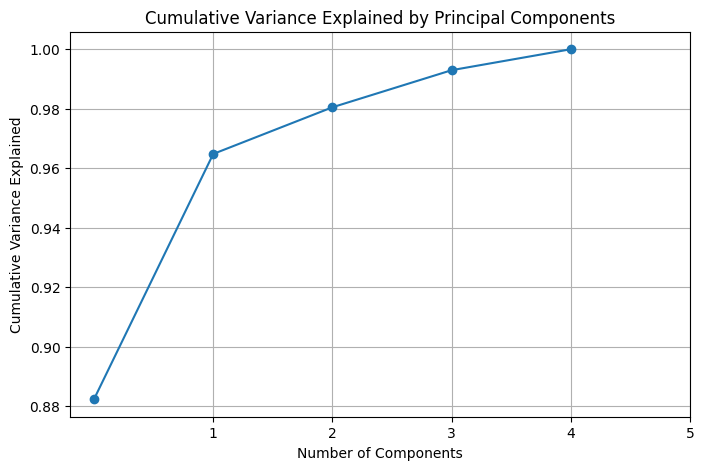

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.xticks(range(1, len(explained_var_ratio)+1))
plt.show()


This is a visual expression for what have been previously explained

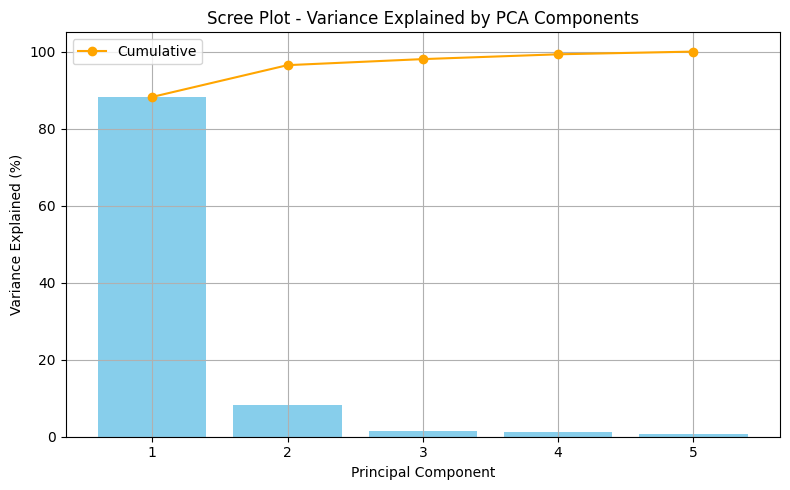

In [25]:
# Fit PCA again if needed
pca = PCA()
pca.fit(yield_changes)

# Get variance explained
explained_var_ratio = pca.explained_variance_ratio_
components = np.arange(1, len(explained_var_ratio)+1)

# Plot scree plot
plt.figure(figsize=(8, 5))
plt.bar(components, explained_var_ratio * 100, color='skyblue')
plt.plot(components, np.cumsum(explained_var_ratio * 100), marker='o', color='orange', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot - Variance Explained by PCA Components')
plt.xticks(components)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Comparison between the Scree Plot from the uncorrelated Gaussian data and the Scree Plot from the US government securities (Treasury maturities)**

The Scree Plot comparison highlights a stark contrast in data structure. For uncorrelated data, variance is evenly distributed across all principal components, resulting in a linear cumulative curve and no distinct "elbow." This indicates no dominant underlying factors. Conversely, the government securities data shows variance highly concentrated in the first principal component (explaining ~88-89%), with a dramatic drop-off thereafter. This creates a pronounced "elbow" after PC1, signifying strong correlations and that most yield movements are driven by just one or two key factors (level and slope), allowing for significant dimensionality reduction.

# **Empirical Analysis of ETFs**

/tmp/ipython-input-26-4063072089.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


📌 Top 30 XLRE Holdings:
    No. Symbol                                     Name % Weight   Shares
0     1    AMT               American Tower Corporation    9.55%  3231302
1     2    PLD                           Prologis, Inc.    9.22%  6405025
2     3   WELL                           Welltower Inc.    8.73%  4288246
3     4   EQIX                            Equinix, Inc.    7.08%   675255
4     5    DLR               Digital Realty Trust, Inc.    5.02%  2185316
5     6      O                Realty Income Corporation    4.79%  6233805
6     7    SPG               Simon Property Group, Inc.    4.70%  2118026
7     8    PSA                           Public Storage    4.30%  1089884
8     9    CCI                        Crown Castle Inc.    4.12%  3005960
9    10   CBRE                         CBRE Group, Inc.    3.87%  2027088
10   11   VICI                     VICI Properties Inc.    3.25%  7294699
11   12   CSGP                       CoStar Group, Inc.    3.19%  2912365
12   13    EXR

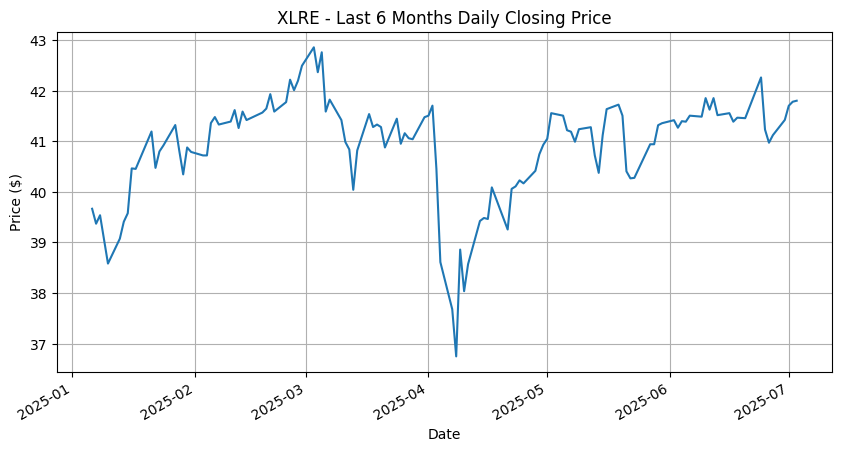

In [26]:
# 1. Get Top 30 Holdings from StockAnalysis.com
def get_xlre_holdings():
    url = 'https://stockanalysis.com/etf/xlre/holdings/'
    headers = {'User-Agent': 'Mozilla/5.0'}

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')

    table = soup.find('table')
    df = pd.read_html(str(table))[0]

    # Keep only top 30
    df_top30 = df.head(30)
    return df_top30

# 2. Download 6-Month Daily Price Data (~120 trading days)
def get_xlre_price_history():
    xlre = yf.Ticker('XLRE')
    df_price = xlre.history(period='6mo')  # ~120 trading days
    return df_price

# 3. Plotting helper
def plot_price(df_price):
    df_price['Close'].plot(figsize=(10, 5), title="XLRE - Last 6 Months Daily Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.grid(True)
    plt.show()

# Run All
holdings_df = get_xlre_holdings()
price_df = get_xlre_price_history()

# Display outputs
print("📌 Top 30 XLRE Holdings:")
print(holdings_df)

print("\n📊 XLRE Price Data (Last 6 Months):")
print(price_df.head())

# Plot price trend
plot_price(price_df)

/tmp/ipython-input-18-3843035308.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]



📈 Daily Returns (First 5 values):
Date
2025-01-07 00:00:00-05:00   -0.007448
2025-01-08 00:00:00-05:00    0.004252
2025-01-10 00:00:00-05:00   -0.024159
2025-01-13 00:00:00-05:00    0.012762
2025-01-14 00:00:00-05:00    0.008569
Name: Close, dtype: float64


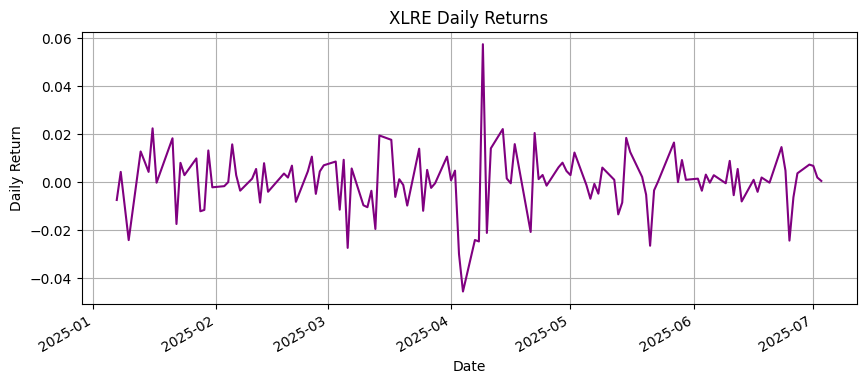

In [19]:
# 4. Compute Daily Returns
def compute_daily_returns(price_df):
    daily_returns = price_df['Close'].pct_change().dropna()  # % change from previous day
    return daily_returns
# Existing code
holdings_df = get_xlre_holdings()
price_df = get_xlre_price_history()

# Compute daily returns
returns_series = compute_daily_returns(price_df)

# Display
print("\n📈 Daily Returns (First 5 values):")
print(returns_series.head())

# Optional: Plot returns
returns_series.plot(figsize=(10, 4), title="XLRE Daily Returns", color='purple')
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()


In [20]:
# 1. Get top 30 XLRE holdings
def get_top_holdings(n=30):
    url = 'https://stockanalysis.com/etf/xlre/holdings/'
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    table = soup.find('table')
    df = pd.read_html(str(table))[0]
    return df['Symbol'].head(n).tolist()

# 2. Download price data and compute returns
def get_returns(tickers):
    data = yf.download(tickers, period="6mo")['Close']
    daily_returns = data.pct_change().dropna()
    return daily_returns

# 3. Compute Covariance Matrix
def compute_covariance_matrix(returns_df):
    return returns_df.cov()

# Run all steps
tickers = get_top_holdings(n=30)
returns_df = get_returns(tickers)
cov_matrix = compute_covariance_matrix(returns_df)

# Display result
print("📊 Covariance Matrix of Daily Returns (Top 30 XLRE Holdings):")
print(cov_matrix.round(6))

/tmp/ipython-input-20-1321677285.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/tmp/ipython-input-20-1321677285.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="6mo")['Close']
[*********************100%***********************]  30 of 30 completed

📊 Covariance Matrix of Daily Returns (Top 30 XLRE Holdings):
Ticker       AMT       ARE       AVB       BXP      CBRE       CCI       CPT  \
Ticker                                                                         
AMT     0.000317  0.000105  0.000092  0.000066  0.000041  0.000272  0.000101   
ARE     0.000105  0.000459  0.000231  0.000315  0.000286  0.000148  0.000224   
AVB     0.000092  0.000231  0.000245  0.000237  0.000231  0.000121  0.000215   
BXP     0.000066  0.000315  0.000237  0.000477  0.000325  0.000101  0.000221   
CBRE    0.000041  0.000286  0.000231  0.000325  0.000461  0.000072  0.000211   
CCI     0.000272  0.000148  0.000121  0.000101  0.000072  0.000365  0.000133   
CPT     0.000101  0.000224  0.000215  0.000221  0.000211  0.000133  0.000237   
CSGP    0.000046  0.000224  0.000151  0.000278  0.000275  0.000082  0.000149   
DLR     0.000019  0.000170  0.000130  0.000216  0.000254  0.000035  0.000114   
DOC     0.000120  0.000248  0.000176  0.000208  0.000206  0

In [21]:
# 4. Center the data (mean zero for each stock)
returns_centered = returns_df - returns_df.mean()

# 5. Apply PCA
pca = PCA()
pca.fit(returns_centered)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Print explained variance
print("📌 PCA Explained Variance Ratio (Top Components):")
for i, var in enumerate(explained_variance[:10]):
    print(f"Component {i+1}: {var:.4f}")

📌 PCA Explained Variance Ratio (Top Components):
Component 1: 0.5615
Component 2: 0.1200
Component 3: 0.0626
Component 4: 0.0412
Component 5: 0.0298
Component 6: 0.0264
Component 7: 0.0205
Component 8: 0.0163
Component 9: 0.0149
Component 10: 0.0132


In [22]:
# 6. SVD (Singular Value Decomposition)
U, S, VT = np.linalg.svd(returns_centered, full_matrices=False)

print("\n🔬 SVD Results:")
print(f"U shape: {U.shape}, S shape: {S.shape}, VT shape: {VT.shape}")

# Optional: Compare PCA eigenvalues to SVD singular values
print("\nFirst 5 Singular Values from SVD:")
print(S[:5])


🔬 SVD Results:
U shape: (122, 30), S shape: (30,), VT shape: (30, 30)

First 5 Singular Values from SVD:
[0.81213674 0.37541122 0.27114445 0.2200053  0.18723302]


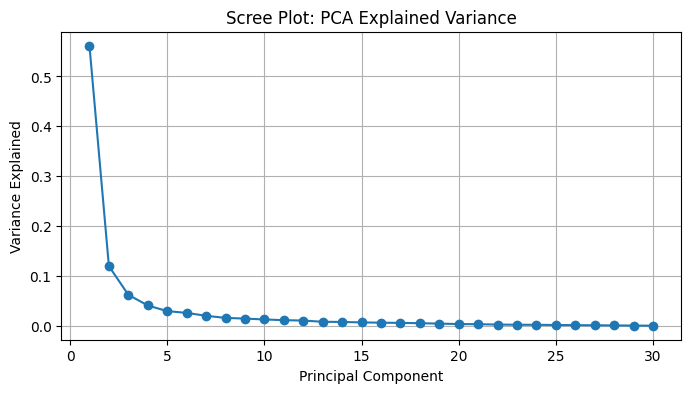

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('Scree Plot: PCA Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# **References**

C.W. Fisher et al. Criticality of data quality as exemplified in two disasters Information Management (2001).

De Boor, C. (1978). A Practical Guide to Splines. *Springer-Verlag*.

Federal Reserve Bank of St. Louis. (n.d.). FRED – U.S. Treasury Constant Maturity Rates. Retrieved from https://fred.stlouisfed.org.
*Accessed via: pandas_datareader Python library, using FRED data API.*

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning with applications in R. Springer.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Springer.

Tsay, R. S. (2005). Analysis of financial time series (2nd ed.). John Wiley & Sons.

Rendleman, R. J., Jr. (2006). Fixed income analytics. John Wiley & Sons.

Tsay, R. S. (2010). Quantitative finance and risk management: A practical guide. John Wiley & Sons.

Nelson, C. R., & Siegel, A. F. (1987). Parsimonious modeling of yield curves. *Journal of Business*, 60(4), 473–489.

N. Jenkinson and I. Leonova (2013). The importance of data quality for effective financial stability policies – Legal entity identifier: a first step towards necessary financial data reforms. *Banque de France* • *Financial Stability Review* • No. 17

W. Fan et al.
Discovering and reconciling value conflicts for numerical data integration
Information Systems
(2001)

S. McKinley and M. Levine (1998), Cubic Spline Interpolation. *College of the Redwoods*

In [4]:
!jupyter nbconvert --to html /FD_Project1.ipynb

[NbConvertApp] Converting notebook /FD_Project1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 849727 bytes to /FD_Project1.html


In [5]:
!apt-get install -y libpango-1.0-0 libpangocairo-1.0-0 libcairo2
!pip install weasyprint
from weasyprint import HTML

# Set paths
html_path = "/FD_Project1.html"
pdf_path = "/content/Copy_of_PO_FD_Project1.pdf"

# Convert HTML to PDF
HTML(html_path).write_pdf(pdf_path)

print(f"PDF saved to: {pdf_path}")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2 is already the newest version (1.16.0-5ubuntu2).
libpango-1.0-0 is already the newest version (1.50.6+ds-2ubuntu1).
libpangocairo-1.0-0 is already the newest version (1.50.6+ds-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


.jp-scrollbar-tiny::-webkit-scrollbar-corner '
    --jp-terminal-icon-background-color,
    var(--jp-inverse-layout-color2)
  )` at 1557:3, unknown property.
      var(--jp-input-active-box-shadow-color),
    inset 0 0 0 3px var(--jp-input-active-box-shadow-color)` at 2783:3, unknown property.
input::placeholder ', unknown pseudo-element: placeholder
    inset 0 0 0 3px var(--jp-input-active-box-shadow-color)` at 3078:3, unknown property.
.lm-CommandPalette-input::-moz-placeholder,
.lm-CommandPalette-input:-ms-input-placeholder '
.cm-searching span::selection ', unknown pseudo-element: selection
.cm-searching > .jp-current-match::selection,
.jp-current-match > .cm-searching span::selection ', unknown pseudo-element: selection
    100% -
      (
        var(--jp-cell-prompt-width) + var(--jp-cell-collapser-width) +
          var(--jp-cell-padding) + var(--jp-cell-padding)
      )
  )` at 6268:3, invalid value.
    left,
    #f6f7f8 0%,
    #edeef1 20%,
    #f6f7f8 40%,
    #f6f7f8 100%


PDF saved to: /content/Copy_of_PO_FD_Project1.pdf


In [6]:
from google.colab import files
files.download("/content/Copy_of_PO_FD_Project1.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>